In [1]:
from joblib import Parallel, delayed
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('runs/*.csv')

In [3]:
dfs = Parallel(n_jobs=20)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)    

In [4]:
df = pd.concat(dfs)

In [5]:
df

,GA,PSO,DE,CMAES,ES,algorithm_run,problem1,problem2,instance1,instance2,alpha,dim,optimum
0,6.284013e-07,6.435180e-06,1.141665e-04,9.858780e-14,0.000062,30,5,14,9,9,0.0,5,1.000000e-20
1,1.314937e-04,4.003109e-08,1.226649e-04,2.997831e-14,0.000048,30,5,14,9,9,0.1,5,1.000000e-20
2,3.948673e-04,1.676903e-05,7.034876e-06,4.229528e-14,0.000169,30,5,14,9,9,0.2,5,1.000000e-20
3,6.440053e-06,1.799590e-05,1.237672e-06,8.765955e-14,0.000287,30,5,14,9,9,0.3,5,1.000000e-20
4,7.483591e-07,4.957064e-05,2.055921e-10,8.120769e-14,0.000114,30,5,14,9,9,0.4,5,1.000000e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2.327984e+01,1.781745e+01,7.249199e-01,3.975967e+00,9.483812,21,11,16,3,3,0.6,5,1.000000e-20
7,1.069329e+01,2.340348e+01,8.670763e+00,2.601950e+01,5.196332,21,11,16,3,3,0.7,5,1.000000e-20
8,1.659491e+01,1.068671e+01,1.571368e+01,1.087486e+01,2.726134,21,11,16,3,3,0.8,5,1.000000e-20
9,1.046051e+01,2.773242e+00,2.078056e+01,4.590189e-15,2.239116,21,11,16,3,3,0.9,5,1.000000e-20


In [6]:
mask = df['problem1'] > df['problem2']
#df.loc[mask, ['problem1', 'problem2']] = df.loc[mask, ['problem2', 'problem1']].copy()
maxv = df[['problem2', 'problem1']].max(axis=1)
minv = df[['problem2', 'problem1']].min(axis=1)
df['problem1'] = minv
df['problem2'] = maxv

df.loc[mask, 'alpha'] = 1 - df.loc[mask, 'alpha']

In [7]:
df

,GA,PSO,DE,CMAES,ES,algorithm_run,problem1,problem2,instance1,instance2,alpha,dim,optimum
0,6.284013e-07,6.435180e-06,1.141665e-04,9.858780e-14,0.000062,30,5,14,9,9,0.0,5,1.000000e-20
1,1.314937e-04,4.003109e-08,1.226649e-04,2.997831e-14,0.000048,30,5,14,9,9,0.1,5,1.000000e-20
2,3.948673e-04,1.676903e-05,7.034876e-06,4.229528e-14,0.000169,30,5,14,9,9,0.2,5,1.000000e-20
3,6.440053e-06,1.799590e-05,1.237672e-06,8.765955e-14,0.000287,30,5,14,9,9,0.3,5,1.000000e-20
4,7.483591e-07,4.957064e-05,2.055921e-10,8.120769e-14,0.000114,30,5,14,9,9,0.4,5,1.000000e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2.327984e+01,1.781745e+01,7.249199e-01,3.975967e+00,9.483812,21,11,16,3,3,0.6,5,1.000000e-20
7,1.069329e+01,2.340348e+01,8.670763e+00,2.601950e+01,5.196332,21,11,16,3,3,0.7,5,1.000000e-20
8,1.659491e+01,1.068671e+01,1.571368e+01,1.087486e+01,2.726134,21,11,16,3,3,0.8,5,1.000000e-20
9,1.046051e+01,2.773242e+00,2.078056e+01,4.590189e-15,2.239116,21,11,16,3,3,0.9,5,1.000000e-20


In [8]:
algos = ['GA', 'PSO', 'DE', 'CMAES', 'ES']
rdf = df[algos].rank(axis=1)
for column in df.columns.difference(algos):
    rdf[column]=df[column]

In [9]:
pure = rdf.query('alpha==0.0').groupby('problem2').mean().reset_index()
pure

,problem2,GA,PSO,DE,CMAES,ES,algorithm_run,alpha,dim,instance1,instance2,optimum,problem1
0,1,4.993333,1.790000,1.790000,2.420000,4.006667,15.5,0.0,5.0,5.5,5.5,1.000000e-20,1.000000
1,2,4.848889,1.786111,1.775556,2.441667,4.147778,15.5,0.0,5.0,5.5,5.5,1.000000e-20,1.333333
2,3,2.743333,2.333667,1.120000,4.666333,4.136667,15.5,0.0,5.0,5.5,5.5,1.000000e-20,1.800000
3,4,2.138095,2.717619,1.228571,4.840000,4.075714,15.5,0.0,5.0,5.5,5.5,1.000000e-20,2.285714
4,5,2.634259,2.634259,2.634259,2.986852,4.110370,15.5,0.0,5.0,5.5,5.5,1.000000e-20,2.777778
5,6,4.139394,1.998030,4.616667,1.109848,3.136061,15.5,0.0,5.0,5.5,5.5,1.000000e-20,3.272727
6,7,4.239231,3.469103,3.423974,1.734615,2.133077,15.5,0.0,5.0,5.5,5.5,1.000000e-20,3.769231
7,8,4.016222,3.832667,2.976000,1.277111,2.898000,15.5,0.0,5.0,5.5,5.5,1.000000e-20,4.266667
8,9,4.339608,3.383431,3.606176,1.294314,2.376471,15.5,0.0,5.0,5.5,5.5,1.000000e-20,4.764706
9,10,4.246316,3.437544,4.205263,1.019825,2.091053,15.5,0.0,5.0,5.5,5.5,1.000000e-20,5.263158


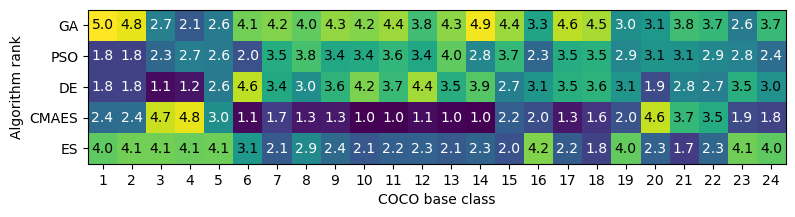

In [10]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 2))

im = ax.imshow(pure[algos].T, aspect='auto')
plt.xticks(range(24), range(1, 25))
plt.yticks(range(len(algos)), algos)

for (j,i),label in np.ndenumerate(pure[algos].T):
    color= 'white' if label<3 else 'black'
    ax.text(i,j, round(float(label), 1), ha='center',va='center', color=color)

plt.ylabel('Algorithm rank')
plt.xlabel('COCO base class')
    
plt.savefig(f'figures/bbob_ranks.pdf', bbox_inches='tight', pad_inches=0)

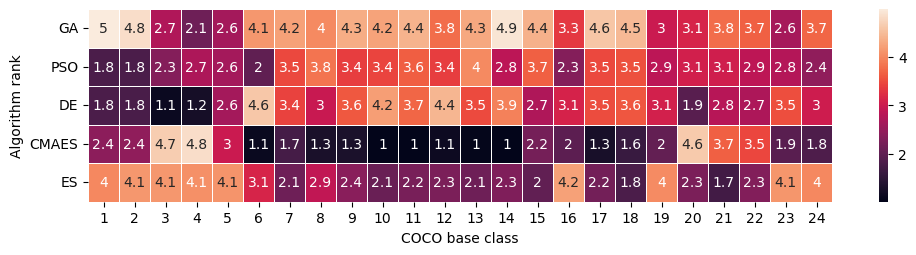

In [11]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(12, 2.5))
glue = pd.DataFrame(pure[algos].T)
sns.heatmap(glue, annot=True, linewidth=.5)
plt.yticks(rotation=0)
new_x_labels = [f"{i+1}" for i in range(glue.shape[1])]
plt.ylabel('Algorithm rank')
plt.xlabel('COCO base class')
plt.xticks(ticks=np.arange(len(new_x_labels)) + 0.5, labels=new_x_labels)
plt.savefig(f'figures/bbob_ranks_gecco.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
pure[algos].T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
GA,4.993333,4.848889,2.743333,2.138095,2.634259,4.139394,4.239231,4.016222,4.339608,4.246316,...,4.396034,3.337634,4.589444,4.475333,2.991712,3.127521,3.769309,3.655194,2.646222,3.709716
PSO,1.790000,1.786111,2.333667,2.717619,2.634259,1.998030,3.469103,3.832667,3.383431,3.437544,...,3.668448,2.334516,3.467071,3.531810,2.854955,3.065385,3.054593,2.865194,2.778000,2.445319
DE,1.790000,1.775556,1.120000,1.228571,2.634259,4.616667,3.423974,2.976000,3.606176,4.205263,...,2.730230,3.123226,3.507879,3.588857,3.087703,1.909188,2.807439,2.707171,3.527556,3.022695
CMAES,2.420000,2.441667,4.666333,4.840000,2.986852,1.109848,1.734615,1.277111,1.294314,1.019825,...,2.198276,1.969570,1.254293,1.611143,2.023919,4.645513,3.664959,3.457791,1.926519,1.815816
ES,4.006667,4.147778,4.136667,4.075714,4.110370,3.136061,2.133077,2.898000,2.376471,2.091053,...,2.007011,4.235054,2.181313,1.792857,4.041712,2.252393,1.703699,2.314651,4.121704,4.006454


In [13]:
rdf.alpha = rdf.alpha.round(2)

In [14]:
lin = rdf.query('(problem2==13 and problem1 == 1)').groupby('alpha').mean().reset_index().sort_values('alpha', ascending=False)

In [15]:
lin

,alpha,GA,PSO,DE,CMAES,ES,algorithm_run,dim,instance1,instance2,optimum,problem1,problem2
10,1.0,4.985000,1.781667,1.781667,2.436667,4.015000,15.5,5.0,5.5,5.5,1.000000e-20,1.0,13.0
9,0.9,4.990000,1.120000,1.880000,3.000000,4.010000,15.5,5.0,5.5,5.5,1.993563e-20,1.0,13.0
8,0.8,4.990000,1.131667,1.871667,2.996667,4.010000,15.5,5.0,5.5,5.5,6.939730e-20,1.0,13.0
7,0.7,4.993333,1.136667,1.866667,2.996667,4.006667,15.5,5.0,5.5,5.5,3.157784e-19,1.0,13.0
6,0.6,4.995000,1.170000,1.865000,2.971667,3.998333,15.5,5.0,5.5,5.5,1.543791e-18,1.0,13.0
5,0.5,4.986667,1.436667,1.896667,2.711667,3.968333,15.5,5.0,5.5,5.5,7.667958e-18,1.0,13.0
4,0.4,4.935000,2.016667,2.403333,1.838333,3.806667,15.5,5.0,5.5,5.5,3.822642e-17,1.0,13.0
3,0.3,4.778333,2.965000,3.028333,1.070000,3.158333,15.5,5.0,5.5,5.5,1.907890e-16,1.0,13.0
2,0.2,4.550000,3.565000,3.483333,1.000000,2.401667,15.5,5.0,5.5,5.5,9.528481e-16,1.0,13.0
1,0.1,4.383333,3.928333,3.536667,1.000000,2.151667,15.5,5.0,5.5,5.5,4.761274e-15,1.0,13.0


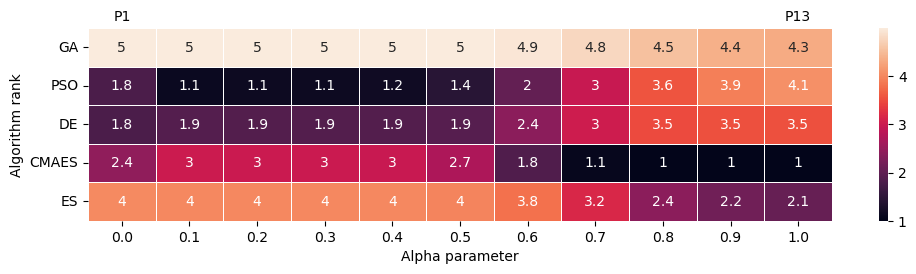

In [16]:
plt.figure(figsize=(12, 2.5))
sns.heatmap(lin[algos].T, annot=True, linewidth=.5)
plt.ylabel('Algorithm rank')
plt.xlabel('Alpha parameter')
plt.yticks(rotation=0)
new_x_labels = [x/10 for x in range(11)]
plt.xticks(ticks=np.arange(len(new_x_labels)) + 0.5, labels=new_x_labels)
plt.text(0.5, -0.3, "P1", ha='center', va='center', color='black')
plt.text(10.5, -0.3, "P13", ha='center', va='center', color='black')
plt.savefig(f'figures/combination_gecco.pdf', bbox_inches='tight', pad_inches=0)

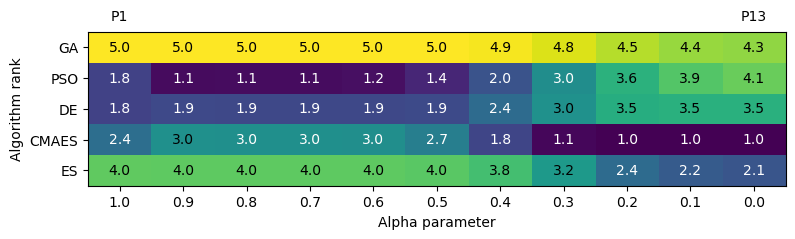

In [17]:
fig, ax = plt.subplots(figsize=(9, 2))

im = ax.imshow(lin[algos].T, aspect='auto')
plt.xticks(range(len(lin)), [round(x, 3) for x in lin.alpha])
plt.yticks(range(len(algos)), algos)

for (j,i),label in np.ndenumerate(lin[algos].T):
    color= 'white' if label<3 else 'black'
    ax.text(i,j, round(float(label), 1),ha='center',va='center', color=color)
    
ax.text(0, -1, "P1", ha='center', va='center', color='black')
ax.text(10, -1, "P13", ha='center', va='center', color='black')

plt.ylabel('Algorithm rank')
plt.xlabel('Alpha parameter')

plt.savefig(f'figures/combination.pdf', bbox_inches='tight', pad_inches=0)